<a href="https://colab.research.google.com/github/chvn00/Modelos_Metodos_IA/blob/main/PGAGV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalar gplearn
!pip install gplearn

import numpy as np
import matplotlib.pyplot as plt
from gplearn.genetic import SymbolicRegressor
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    23.67          3165.74        5         0.296784         0.295145     14.05s
   1     9.86            5.451        5         0.290524         0.351482     11.86s
   2     6.99         0.943082        5           0.2866         0.386803      9.07s
   3     6.08          1.72796        5         0.286945         0.383697      9.32s
   4     5.46         0.969144        5         0.288115         0.373166      8.90s
   5     5.41          16.4906        5         0.289205         0.363359      9.43s
   6     5.12          1.15941        5          0.28731         0.380413      9.11s
   7     5.28          16.6927        5         0.288037         0.373872      7.67s
   8     5.10          4.50345        5         0.286937         0.383771  

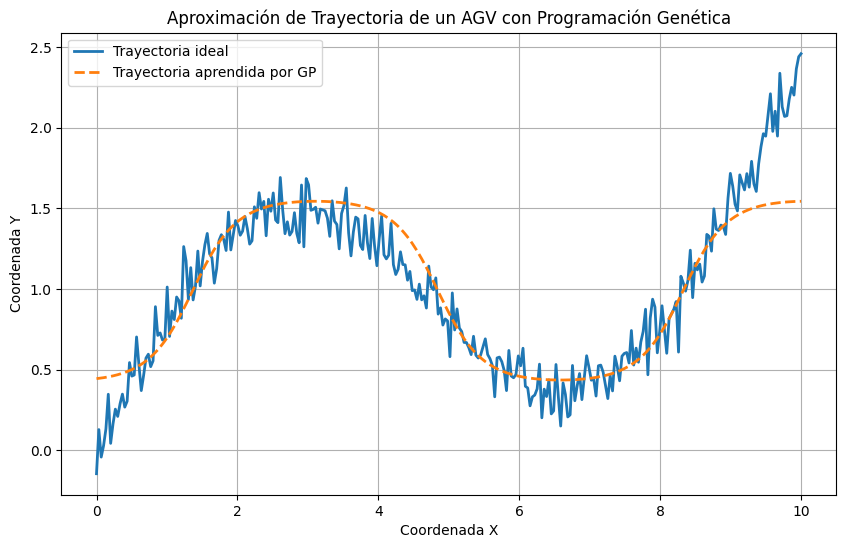

In [ ]:


# Simulamos puntos de una trayectoria ideal (e.g., evitando obstáculos)
# Supongamos que la trayectoria óptima es una curva con forma senoidal modificada
x = np.linspace(0, 10, 300)
y = np.sin(x / 1.5) + 0.2 * x + np.random.normal(0, 0.1, size=x.shape)

# Dataset
X = x.reshape(-1, 1)
y_real = y

# División
X_train, X_test, y_train, y_test = train_test_split(X, y_real, test_size=0.2, random_state=0)

# Modelo GP
gp = SymbolicRegressor(
    population_size=400,
    generations=30,
    function_set=['add', 'sub', 'mul', 'div', 'sin', 'cos'],
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    max_samples=0.9,
    stopping_criteria=0.001,
    verbose=1,
    random_state=0
)

# Entrenar
gp.fit(X_train, y_train)

# Mostrar fórmula simbólica generada
print("\n📌 Fórmula simbólica encontrada por GP:")
print(gp._program)

# Predicción
y_pred = gp.predict(X)

# Gráfica de trayectoria
plt.figure(figsize=(10, 6))
plt.plot(x, y_real, label='Trayectoria ideal', linewidth=2)
plt.plot(x, y_pred, '--', label='Trayectoria aprendida por GP', linewidth=2)
plt.title('Aproximación de Trayectoria de un AGV con Programación Genética')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True)
plt.show()
